In [1]:
%run MachineLearningFunctions.py
from __future__ import division

In [2]:
data = []
with open("/Users/battogtokhb/Downloads/spambase.data.txt", "rb") as f:
    reader = csv.reader(f)
    for row in reader:
        data.append( map(float, row))
        

min_max_scaler = preprocessing.MinMaxScaler()
scaled_data = min_max_scaler.fit_transform(data)

scaled_data_features = [row[0:57] for row in scaled_data]
scaled_data_class = [row[57] for row in scaled_data]

benign_data = [row for row in scaled_data if row[57] == 0]
malignant_data = [row for row in scaled_data if row[57] == 1]

benign_features = [row[0:57] for row in benign_data]
benign_target = [row[57] for row in benign_data]
malignant_features = [row[0:57] for row in malignant_data]
malignant_target = [row[57] for row in malignant_data]

b_train,b_test,tar_b_train,tar_b_test=train_test_split(benign_features,benign_target,test_size=0.1612, train_size = 0.4845, random_state = 8)
m_train,m_test,tar_m_train,tar_m_test=train_test_split(malignant_features,malignant_target,test_size=0.248, train_size = 0.7448, random_state = 8)

train_features = b_train + m_train
train_target = tar_b_train + tar_m_train
test_features = b_test + m_test
test_target = tar_b_test + tar_m_test


In [3]:
#class_machines = [("KNNC", [8,10,12,14,16,18,20,22]), ("RFC", [.04,.08,.12,.16,.20,0.24, 0.28]) , ("SVC", ['linear', 'rbf', 'poly']) ]
#prob_machines =  [("KNNR", [8,10,12,14,16,18,20,22]), ("RFR", [.04,.08,.12,.16,.20,0.24, 0.28]) , ("SVR", ['linear', 'rbf', 'poly']) ]

In [26]:
#class_machines = [("KNNC", [8,10,12,14]), ("RFC", [.04,.08,.12,.16]) , ("SVC", ['linear', 'rbf']) ]
#prob_machines =  [("KNNR", [8,10,12,14]), ("RFR", [.04,.08,.12,.16]) , ("SVR", ['linear', 'rbf']) ]

In [46]:
class_machines = [("KNNC", [8]), ("RFC", [.04]) , ("SVC", ['linear']) ]
prob_machines =  [("KNNR", [8]), ("RFR", [.04]) , ("SVR", ['linear']) ]

In [47]:
class_errors_dict =  OPTIMAL_CLASSIFIER(train_features,train_target, test_features, test_target, class_machines, SYN=False)



TRAINING CELL OUTCOMES
{0: 51, 1: 53, 2: 63, 3: 44, 4: 84, 5: 1246, 6: 1074, 7: 85}


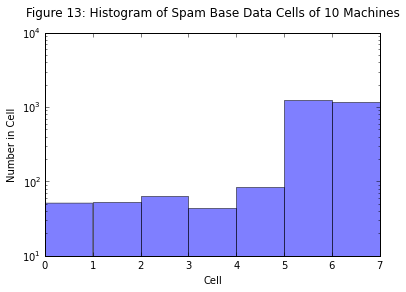

In [49]:
fig, ax = plt.subplots()
cell_dict = {0: 51, 1: 53, 2: 63, 3: 44, 4: 84, 5: 1246, 6: 1074, 7: 85}
cell_list = []
for key in cell_dict:
    for x in range (0, cell_dict[key]):
        cell_list.append(key)

ax.hist(cell_list,bins=cell_dict.keys(), alpha=0.5,log=True, label='benign', color='blue')
ax.set_ylabel("Number in Cell")
ax.set_xlabel("Cell")
title = plt.title("Figure 13: Histogram of Spam Base Data Cells of 10 Machines")
title.set_position([0.5, 1.05])
fig.savefig("/Users/battogtokhb/Documents/Notebooks/Graphics/Figures/13_figure", dpi=600)
fig.show()



In [50]:
cv_features = malignant_features[0:1800] + benign_features[0:1800]
cv_target = malignant_target[0:1800] + benign_target[0:1800]

In [51]:
import random
c = list(zip(cv_features,cv_target))

random.shuffle(c)

shuffled_features, shuffled_class = zip(*c)

In [52]:
cross_val_dict_class = cross_val(shuffled_features, shuffled_class, class_machines)
cross_val_dict_prob = cross_val(shuffled_features, shuffled_class, prob_machines, VERBOSE=True)



KNNR 8 VALUES:  [0.098611111111111094, 0.11805555555555558, 0.081944444444444486, 0.095833333333333326, 0.1166666666666667] VARIANCE:  0.0152018314361
RFR 0.04 VALUES:  [0.10555555555555551, 0.098611111111111094, 0.084722222222222254, 0.125, 0.12222222222222223] VARIANCE:  0.0167647576411
SVR linear VALUES:  [0.12083333333333335, 0.12777777777777777, 0.10416666666666663, 0.12777777777777777, 0.13749999999999996] VARIANCE:  0.0123837184029


In [53]:
oc_classifier_class_nosyn =  OPTIMAL_CV(shuffled_features, shuffled_class, class_machines, SYN=False) 
oc_classifier_class_syn =  OPTIMAL_CV(shuffled_features, shuffled_class, class_machines, SYN=True) 



TRAINING CELL OUTCOMES
{0: 47, 1: 52, 2: 62, 3: 50, 4: 84, 5: 1294, 6: 1223, 7: 68}
TRAINING CELL OUTCOMES
{0: 32, 1: 48, 2: 69, 3: 60, 4: 92, 5: 1326, 6: 1209, 7: 44}
TRAINING CELL OUTCOMES
{0: 47, 1: 53, 2: 58, 3: 40, 4: 101, 5: 1307, 6: 1206, 7: 68}
TRAINING CELL OUTCOMES
{0: 37, 1: 49, 2: 56, 3: 50, 4: 99, 5: 1329, 6: 1196, 7: 64}
TRAINING CELL OUTCOMES
{0: 43, 1: 41, 2: 58, 3: 56, 4: 86, 5: 1329, 6: 1209, 7: 58}
TRAINING CELL OUTCOMES
{0: 6, 1: 22, 2: 38, 3: 14, 4: 24, 5: 1377, 6: 1375, 7: 24}
TRAINING CELL OUTCOMES
{0: 5, 1: 28, 2: 53, 3: 25, 4: 17, 5: 1397, 6: 1344, 7: 11}
TRAINING CELL OUTCOMES
{0: 14, 1: 23, 2: 33, 3: 18, 4: 11, 5: 1402, 6: 1351, 7: 28}
TRAINING CELL OUTCOMES
{0: 41, 1: 6, 2: 31, 3: 24, 4: 11, 5: 1419, 6: 1341, 7: 7}
TRAINING CELL OUTCOMES
{0: 8, 1: 19, 2: 34, 3: 19, 4: 6, 5: 1421, 6: 1337, 7: 36}


In [54]:
oc_classifier_prob_nosyn =  OPTIMAL_CV(shuffled_features, shuffled_class, prob_machines, classifier=True, SYN=False) 
oc_classifier_prob_syn =  OPTIMAL_CV(shuffled_features, shuffled_class, prob_machines, classifier=True, SYN=True) 

TRAINING CELL OUTCOMES
{0: 129, 1: 39, 2: 72, 3: 50, 4: 101, 5: 1234, 6: 1114, 7: 141}
TRAINING CELL OUTCOMES
{0: 120, 1: 38, 2: 72, 3: 45, 4: 103, 5: 1284, 6: 1107, 7: 111}
TRAINING CELL OUTCOMES
{0: 137, 1: 31, 2: 71, 3: 43, 4: 111, 5: 1250, 6: 1099, 7: 138}
TRAINING CELL OUTCOMES
{0: 137, 1: 35, 2: 64, 3: 44, 4: 118, 5: 1274, 6: 1069, 7: 139}
TRAINING CELL OUTCOMES
{0: 132, 1: 41, 2: 67, 3: 44, 4: 83, 5: 1243, 6: 1112, 7: 158}
TRAINING CELL OUTCOMES
{0: 76, 1: 71, 2: 1345, 3: 1388}
TRAINING CELL OUTCOMES
{0: 74, 1: 83, 2: 1, 3: 1308, 4: 1328, 5: 86}
TRAINING CELL OUTCOMES
{0: 64, 1: 86, 2: 1332, 3: 1398}
TRAINING CELL OUTCOMES
{0: 92, 1: 75, 2: 3, 3: 1320, 4: 1313, 5: 77}
TRAINING CELL OUTCOMES
{0: 66, 1: 69, 2: 1325, 3: 1420}


In [55]:
def SLM_REGRESSOR(train_features, train_target, test_features, test_target, machines, VERBOSE=False, CV=True):
    
    functions_dict = {'KNNC': KNNC, 'RFC': RFC, 'SVC': SVC, 'KNNR': KNNR, 'RFR': RFR, 'SVR': SVR}
    
    #Generate synthetic features for training and testing -> final = original features + synthetic 

    final_train_features = train_features
    for machine_name, machine_settings in machines:
            for machine_setting in machine_settings:
            #print functions_dict[machine_name](machine_setting, train_features )
                if VERBOSE:
                    print machine_name, machine_setting, "train sf"
                final_train_features =  np.column_stack( (final_train_features, np.reshape(functions_dict[machine_name](machine_setting, train_features,  train_target,train_features,test_target ), len(train_features ), 1))  )

        

    final_test_features = test_features
    for machine_name, machine_settings in machines:
            for machine_setting in machine_settings:
                    if VERBOSE:
                        print machine_name, machine_setting, "test sf"
                    final_test_features =  np.column_stack( (final_test_features, np.reshape(functions_dict[machine_name](machine_setting, train_features, train_target,test_features,test_target), len(test_features ), 1))  )

    final_machine = RandomForestRegressor(min_weight_fraction_leaf=0.12)
    final_machine = final_machine.fit(final_train_features, train_target)
    final_prediction = final_machine.predict(final_test_features)
    final_prediction_scale = probability_to_classification(final_prediction)
    
    if CV:
        return 1 - sklearn.metrics.accuracy_score(test_target,final_prediction_scale)



In [56]:
def SLM_CLASSIFIER(train_features, train_target, test_features, test_target, machines, VERBOSE=False, CV=True):
    
    functions_dict = {'KNNC': KNNC, 'RFC': RFC, 'SVC': SVC, 'KNNR': KNNR, 'RFR': RFR, 'SVR': SVR}
    
    #Generate synthetic features for training and testing -> final = original features + synthetic 

    final_train_features = train_features
    for machine_name, machine_settings in machines:
            for machine_setting in machine_settings:
            #print functions_dict[machine_name](machine_setting, train_features )
                if VERBOSE:
                    print machine_name, machine_setting, "train sf"
                final_train_features =  np.column_stack( (final_train_features, np.reshape(functions_dict[machine_name](machine_setting, train_features,  train_target,train_features,test_target ), len(train_features ), 1))  )

        

    final_test_features = test_features
    for machine_name, machine_settings in machines:
            for machine_setting in machine_settings:
                    if VERBOSE:
                        print machine_name, machine_setting, "test sf"
                    final_test_features =  np.column_stack( (final_test_features, np.reshape(functions_dict[machine_name](machine_setting, train_features, train_target,test_features,test_target), len(test_features ), 1))  )

    final_machine = RandomForestClassifier(min_weight_fraction_leaf=0.12)
    final_machine = final_machine.fit(final_train_features, train_target)
    final_prediction = final_machine.predict(final_test_features)
    
    if CV:
        return 1 - sklearn.metrics.accuracy_score(test_target,final_prediction)

    

In [57]:
def SLM_CV(features, target, machines, classifier=True, VERBOSE=False):
    kf = KFold(len(features), n_folds=5)
    error_list = []
    for train_index, test_index in kf:
        
        train_features, train_target =  np.array(features)[train_index], np.array(target)[train_index]
        test_features, test_target = np.array(features)[test_index], np.array(target)[test_index]
        if classifier:
            error_list.append(SLM_CLASSIFIER(train_features, train_target, test_features, test_target, machines, CV=True))
        else:
            error_list.append(SLM_REGRESSOR(train_features, train_target, test_features, test_target, machines, CV=True))
            
    name = "Synthetic Learning Machine" 
    mean = np.mean(error_list)
    difference = [(x-mean)**2 for x in error_list]
    sum_difference = sum(difference)
    sum_difference = sum_difference / (5-1)
    variance = sqrt(sum_difference)
    cv_dict = {}
    cv_dict[name] = [np.mean(error_list), variance]
    return cv_dict



In [58]:
slm_class = SLM_CV(shuffled_features, shuffled_class, class_machines, classifier=True)
slm_prob = SLM_CV(shuffled_features, shuffled_class, prob_machines, classifier=False)

In [59]:
def merge_dicts(*dict_args):
    '''
    Given any number of dicts, shallow copy and merge into a new dict,
    precedence goes to key value pairs in latter dicts.
    '''
    result = {}
    for dictionary in dict_args:
        result.update(dictionary)
    return result



In [60]:
cv_dict_class = merge_dicts(cross_val_dict_class, oc_classifier_class_nosyn, oc_classifier_class_syn)
cv_dict_prob = merge_dicts (cross_val_dict_prob, oc_classifier_prob_nosyn, oc_classifier_prob_syn)

In [61]:
cv_dict_class = merge_dicts(cv_dict_class, slm_class)
cv_dict_prob = merge_dicts(cv_dict_class, slm_prob)

In [64]:
def cross_val_four_graphs(cross_val_dict_class, cross_val_dict_prob,  title='', text='', label='', SAVE=False):
 
    cross_val_dict_class = OrderedDict(sorted(cross_val_dict_class.items(), key=lambda t: float(t[0].split(' ')[2] ) if t[0].split(' ')[2].isalpha() == False else t[0].split(' ')[2].swapcase()  ))
    cross_val_dict_prob = OrderedDict(sorted(cross_val_dict_prob.items(), key=lambda t: float(t[0].split(' ')[2] ) if t[0].split(' ')[2].isalpha() == False else t[0].split(' ')[2].swapcase()  ))
    
    
    f, (ax, ax1) = plt.subplots(1, 2, figsize=(14,4.5), sharey=False, sharex=False)
    color = plt.get_cmap('Dark2')
    cNorm  = colors.Normalize(vmin=0, vmax= len(cross_val_dict_class))
    scalarMap = cmx.ScalarMappable(norm=cNorm, cmap= color)
    dict_x = range(len(cross_val_dict_class))

    dict_list =  [cross_val_dict_class, cross_val_dict_prob]
    ax_list = [ax, ax1]
    for dict_, ax_ in zip(dict_list, ax_list):
            marker = cycle(('v', 'd', '^', '>', 'p'))
            for i in range(len(dict_)):
                colorVal = scalarMap.to_rgba(i)
                if dict_.keys()[i] == "Optimal Crowd Classifier SYN=False":
                    ax_.errorbar(dict_x[i], dict_.values()[i][0], yerr=dict_.values()[i][1],  ms=13, marker = '*', mfc='red', ecolor='red', color='red', elinewidth= 1, label=dict_.keys()[i],  lw = 0.5)
                elif dict_.keys()[i] == "Optimal Crowd Classifier SYN=True":
                    ax_.errorbar(dict_x[i], dict_.values()[i][0], yerr=dict_.values()[i][1], ms=13, marker = '*', mfc='blue', ecolor='blue', color='blue', elinewidth= 1,label=dict_.keys()[i], lw = 0.5)
                elif dict_.keys()[i] == "Optimal Crowd Regressor SYN=False":
                    ax_.errorbar(dict_x[i], dict_.values()[i][0],yerr=dict_.values()[i][1],  ms=10, marker = 'o', mfc='red', ecolor='red', color='red', elinewidth= 1,label=dict_.keys()[i], lw = 0.5)
                elif dict_.keys()[i] == "Optimal Crowd Regressor SYN=True":
                    ax_.errorbar(dict_x[i], dict_.values()[i][0],yerr=dict_.values()[i][1],  ms=10, marker = 'o', mfc='blue', ecolor='blue', color='blue', elinewidth= 1,label=dict_.keys()[i], lw = 0.5)
                elif dict_.keys()[i] == "Synthetic Learning Machine":
                    ax_.errorbar(dict_x[i], dict_.values()[i][0], yerr=dict_.values()[i][1],  ms=10, marker = 'o', mfc='green', ecolor='green', color='green', elinewidth= 1,label=dict_.keys()[i], lw = 0.5)
                else:
                    ax_.errorbar(dict_x[i], dict_.values()[i][0],yerr=dict_.values()[i][1],  ms=11, marker = next(marker), mfc=colorVal, ecolor=colorVal, color=colorVal, elinewidth=1, label=dict_.keys()[i], lw = 0.5)
   
   
    ax1.xaxis.set_major_formatter(NullFormatter())
    ax.xaxis.set_major_formatter(NullFormatter())
    
    
    handles, labels = ax.get_legend_handles_labels()
    # remove the errorbars
    handles = [h[0] for h in handles]
# use them in the legend
    
    
    art1 = ax.legend(handles, labels, loc=10, bbox_to_anchor=(1.1, -0.4), ncol=3, fontsize='large', numpoints=1)
    art2 = f.suptitle(title, fontsize=14, y=1.05)
    ax.axis("tight")
    
    ax.set_ylabel('Percent Error', fontsize=12)
    ax1.set_ylabel('Percent Error', fontsize=12)
    ax1.set_title('5b. ' + 'Pure Classification', fontsize=12)
    ax.set_title('5a. ' + 'Classification Based on Probability', fontsize=12)
    bbox_props = dict(boxstyle="square,pad=0.3", fc="white", ec="black", lw=0.5)
     
    ax.set_ylim([0,0.25])
    ax1.set_ylim([0,0.25])
    
    major_ticks = np.arange(0, 0.3, 0.05)                                              
    minor_ticks = np.arange(0, 0.3, 0.025)  
    
    ax.set_yticks(major_ticks)                                                       
    ax.set_yticks(minor_ticks, minor=True) 
    
    ax1.set_yticks(major_ticks)                                                       
    ax1.set_yticks(minor_ticks, minor=True) 
    
    
    
    ax.grid(which='minor', alpha=0.4)                                                
    ax.grid(which='major', alpha=0.6)      
    ax.xaxis.set_ticks(range(20))
    ax.set_xlim([-1,len(cross_val_dict_class)])
    
    ax1.grid(which='minor', alpha=0.4)                                                
    ax1.grid(which='major', alpha=0.6)      
    
    ax1.set_xlim([-1,len(cross_val_dict_class)])
    ax1.xaxis.set_ticks(range(len(cross_val_dict_class)))
    ax.xaxis.set_ticks(range(len(cross_val_dict_class)))
    #ax3.set_ylabel('Mean Squared Error', fontsize=12)
    #ax4.set_ylabel('Mean Squared Error', fontsize=12)
    if SAVE:
        f.savefig('/Users/battogtokhb/Documents/Notebooks/Graphics/Figures/12_figure', dpi=600,  bbox_extra_artists= (art1,art2,),  bbox_inches='tight')
    

    f.show()


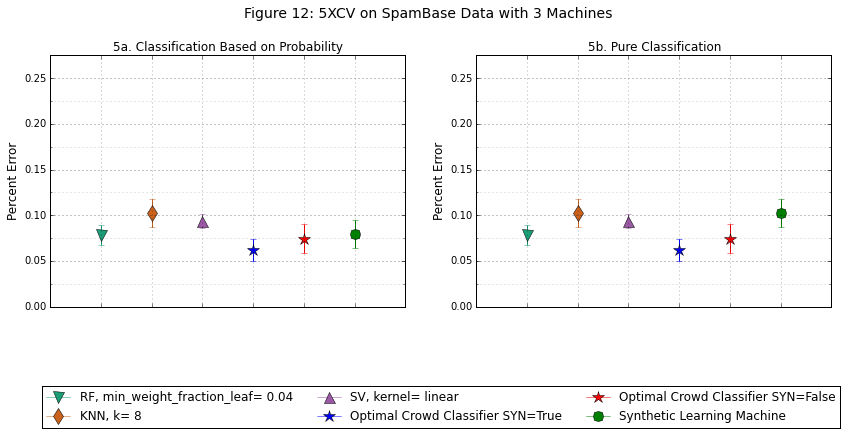

In [66]:
cross_val_four_graphs(cv_dict_class, cv_dict_prob,  title='Figure 12: 5XCV on SpamBase Data with 3 Machines', text=text, label ='f', SAVE=True)

In [40]:
print "hello"

hello


In [ ]:
prob_machines

In [41]:
oc_alpha1_error, oc_alpha1_prediction = OPTIMAL_REGRESSOR_ALPHA(train_features, train_target, test_features, test_target, prob_machines, ALPHA=0.05,SYN=True, VERBOSE=True)



KNNR 8 train sf
KNNR 10 train sf
KNNR 12 train sf
KNNR 14 train sf
KNNR 16 train sf
KNNR 18 train sf
KNNR 20 train sf
KNNR 22 train sf
RFR 0.04 train sf
RFR 0.08 train sf
RFR 0.12 train sf
RFR 0.16 train sf
RFR 0.2 train sf
RFR 0.24 train sf
RFR 0.28 train sf
SVR linear train sf
SVR rbf train sf
SVR poly train sf
KNNR 8 test sf
KNNR 10 test sf
KNNR 12 test sf
KNNR 14 test sf
KNNR 16 test sf
KNNR 18 test sf
KNNR 20 test sf
KNNR 22 test sf
RFR 0.04 test sf
RFR 0.08 test sf
RFR 0.12 test sf
RFR 0.16 test sf
RFR 0.2 test sf
RFR 0.24 test sf
RFR 0.28 test sf
SVR linear test sf
SVR rbf test sf
SVR poly test sf
final_test_features:  (900, 75) final_train_features:  (2700, 75)
RFR0.2 1
RFR0.2 2
RFR0.2 3
RFR0.2 4
RFR0.2 5
RFR0.2 6
RFR0.2 7
RFR0.2 8
RFR0.2 9
RFR0.2 10
RFR0.2 11
RFR0.2 12
RFR0.2 13
RFR0.2 14
RFR0.2 15
RFR0.2 16
RFR0.2 17
RFR0.2 18
RFR0.2 19
RFR0.2 20
RFR0.2 21
RFR0.2 22
RFR0.2 23
RFR0.2 24
RFR0.2 25
RFR0.2 26
RFR0.2 27
RFR0.2 28
RFR0.2 29
RFR0.2 30
RFR0.2 31
RFR0.2 32
RFR0.2 33
R

In [43]:
oc_alpha2_error, oc_alpha2_prediction = OPTIMAL_REGRESSOR_ALPHA(train_features, train_target, test_features, test_target, prob_machines, ALPHA=0.1,SYN=True, VERBOSE=True)



KNNR 8 train sf
KNNR 10 train sf
KNNR 12 train sf
KNNR 14 train sf
KNNR 16 train sf
KNNR 18 train sf
KNNR 20 train sf
KNNR 22 train sf
RFR 0.04 train sf
RFR 0.08 train sf
RFR 0.12 train sf
RFR 0.16 train sf
RFR 0.2 train sf
RFR 0.24 train sf
RFR 0.28 train sf
SVR linear train sf
SVR rbf train sf
SVR poly train sf
KNNR 8 test sf
KNNR 10 test sf
KNNR 12 test sf
KNNR 14 test sf
KNNR 16 test sf
KNNR 18 test sf
KNNR 20 test sf
KNNR 22 test sf
RFR 0.04 test sf
RFR 0.08 test sf
RFR 0.12 test sf
RFR 0.16 test sf
RFR 0.2 test sf
RFR 0.24 test sf
RFR 0.28 test sf
SVR linear test sf
SVR rbf test sf
SVR poly test sf
final_test_features:  (900, 75) final_train_features:  (2700, 75)
RFR0.2 1
RFR0.2 2
RFR0.2 3
RFR0.2 4
RFR0.2 5
RFR0.2 6
RFR0.2 7
RFR0.2 8
RFR0.2 9
RFR0.2 10
RFR0.2 11
RFR0.2 12
RFR0.2 13
RFR0.2 14
RFR0.2 15
RFR0.2 16
RFR0.2 17
RFR0.2 18
RFR0.2 19
RFR0.2 20
RFR0.2 21
RFR0.2 22
RFR0.2 23
RFR0.2 24
RFR0.2 25
RFR0.2 26
RFR0.2 27
RFR0.2 28
RFR0.2 29
RFR0.2 30
RFR0.2 31
RFR0.2 32
RFR0.2 33
R

In [44]:
 def graph_maker(x, y, title='four_graphs', text='', ylabel='Probability',  SAVE=False):

  
    dict_x= list(range(len(x)))
    
    


    color = plt.get_cmap('Set1')
    cNorm  = colors.Normalize(vmin=0, vmax= len(dict_x)-1 )
    scalarMap = cmx.ScalarMappable(norm=cNorm, cmap= color)

 

    marker = cycle(('v', 'd', '^', '>', 'p'))
    for i in range(len(dict_x)):
        colorVal = scalarMap.to_rgba(i)
        plt.scatter(dict_x[i], y[i] ,  s=250, marker = '*', c=colorVal, label=x[i], lw=0.5)
    


     

    plt.locator_params(axis='x',nbins=26)

    plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='on',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')
    

    
    plt.title(title, fontsize=13)

    
    plt.xlabel("Machines", fontsize=12)

    
    plt.ylabel("Percent Error", fontsize=12)

    
    bbox_prop = dict(boxstyle="square,pad=0.3", fc="white", ec="black", lw=0.5)
    plt.axis('tight')
    art = pylab.legend(loc=10, bbox_to_anchor=(0.5, -0.40), ncol=3, fontsize='large', scatterpoints=1)
  
  


    plt.xticks(range(len(dict_x)) )
##
    plt.xlim([-1,len(dict_x)])
  #  plt.xlabel(x)





    
    
    

    


    if SAVE:
        plt.savefig('/Users/battogtokhb/Documents/Notebooks/Graphics/'+title+'.pdf',  dpi=550,  bbox_extra_artists= (art,),  bbox_inches='tight')
        
    plt.show()
    

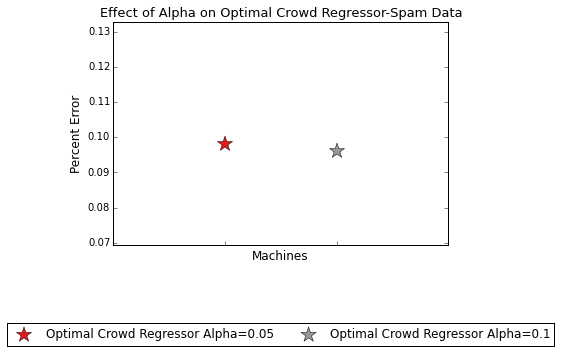

In [46]:
x = "Optimal Crowd Regressor Alpha=0.05", "Optimal Crowd Regressor Alpha=0.1"
y = oc_alpha1_error[1], oc_alpha2_error[1]
graph_maker(x, y, title='Effect of Alpha on Optimal Crowd Regressor-Spam Data', text='', ylabel='Probability',  SAVE=True)